In [1]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt

In [2]:
def eulerstep(A, uold, h):
    unew = uold + h*A@uold
    return unew

def eulerint(A, y0, t0, tf, N,):
    h = (tf-t0)/N
    tgrid = np.linspace(t0,tf,N)
    dim = A.shape

    Y = np.zeros((N, dim[0])) 
    Y[0,:] = y0

    for i in range(N-1):
         x = eulerstep(A, np.transpose(Y[i, :]), h)
         Y[i+1,:] = np.transpose(x)

    correct = np.zeros_like(Y)
    error = np.zeros_like(Y)
    for i in range(N):
        correct[i,:] = la.expm(A*tgrid[i])@y0

    error = abs(Y-correct)


    return tgrid, Y, error, correct

def errVSh(A, y0, t0, tf):
    Nvec = [int(np.power(2,i)) for i in range(3, 10)]
    err = np.zeros((len(Nvec), len(y0)))
    for i in range(len(Nvec)):
        tgrid, approx, mat, correct = eulerint(A, y0, t0, tf, Nvec[i])
        err[i,:] = mat[-1,:]

    h=np.zeros(len(Nvec))
    for i in range(len(Nvec)):
        h[i] = (tf - t0) /Nvec[i]
    plt.grid()
    plt.xlabel("Steglängden h")
    plt.ylabel("Felet på uppskattningen")
    plt.title("Felet som funktion av steglängden i loglog-skala")
    plt.loglog(h, err, 'r')

## Testing our functions

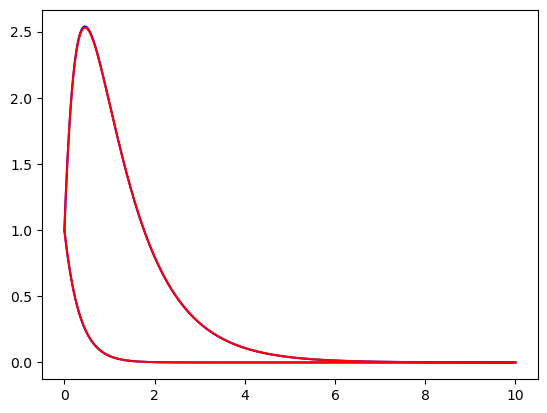

In [3]:
y0 = np.array([1, 1])
A = np.array([[-1, 10], [0, -3]])

tgrid, approx, err, correct = eulerint(A, y0, 0, 10, 2000)

plt.plot(tgrid, approx, 'b')
plt.plot(tgrid, correct, 'r')

## Task 1.4

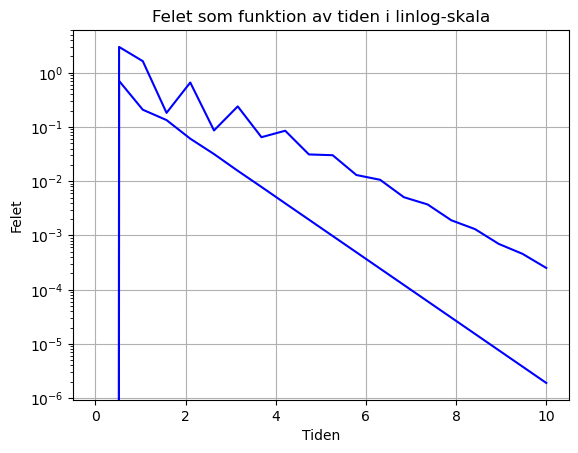

In [4]:
tgrid, approx, err, correct = eulerint(A, y0, 0, 10, 20)
plt.grid()
plt.ylabel("Felet")
plt.xlabel("Tiden")
plt.title("Felet som funktion av tiden i linlog-skala")
plt.semilogy(tgrid, err, 'b')

## Task 1.3

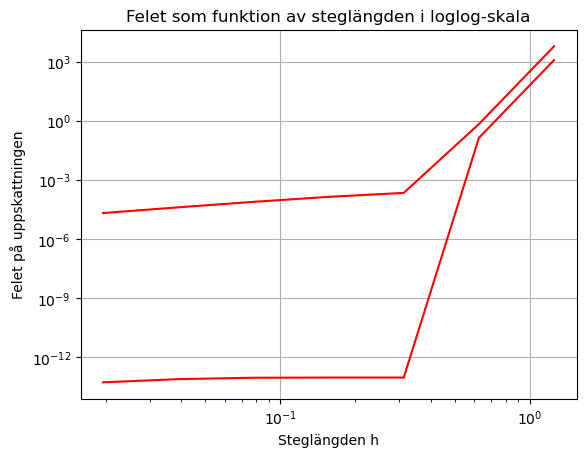

In [5]:
errVSh(A, y0, 0, 10)


## Implicit method

In [11]:
def eulerstep(A, uold, h):
    unit_matrix = np.eye(A.shape[0])
    unew = np.linalg.inv(unit_matrix - h*A)@uold

    return unew

def eulerint(A, y0, t0, tf, N,):
    h = (tf-t0)/N
    tgrid = np.linspace(t0,tf,N)
    dim = A.shape

    Y = np.zeros((N, dim[0])) 
    Y[0,:] = y0

    for i in range(N-1):
         x = eulerstep(A, np.transpose(Y[i, :]), h)
         Y[i+1,:] = np.transpose(x)

    correct = np.zeros_like(Y)
    error = np.zeros_like(Y)
    for i in range(N):
        correct[i,:] = la.expm(A*tgrid[i])@y0

    error = abs(Y-correct)


    return tgrid, Y, error, correct

## Testing code (implicit)

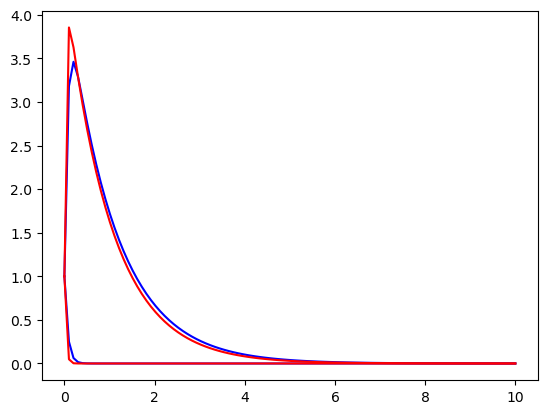

In [12]:
y0 = np.array([1, 1])
A = np.array([[-1, 100], [0, -30]])

tgrid, approx, err, correct = eulerint(A, y0, 0, 10, 100)

plt.plot(tgrid, approx, 'b')
plt.plot(tgrid, correct, 'r')

## Task 1.4 (implicit)

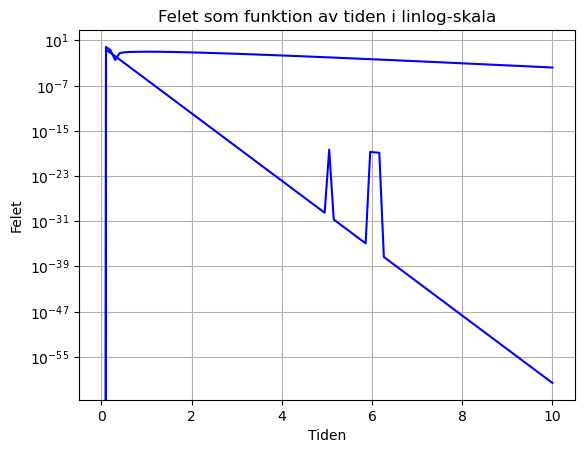

In [23]:
tgrid, approx, err, correct = eulerint(A, y0, 0, 10, 100)
plt.grid()
plt.ylabel("Felet")
plt.xlabel("Tiden")
plt.title("Felet som funktion av tiden i linlog-skala")
plt.semilogy(tgrid, err, 'b')
#plt.plot(tgrid,approx)

## Task 1.3 (implicit)

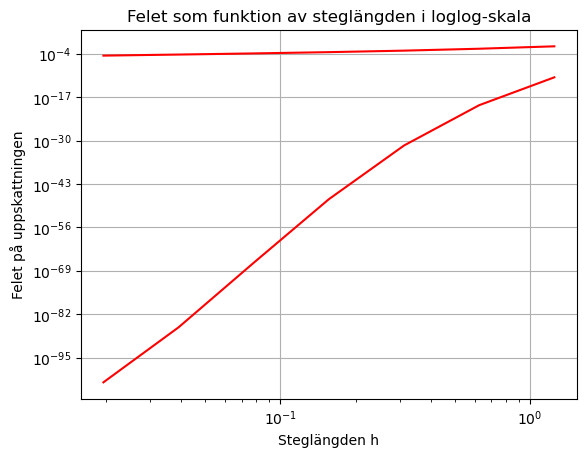

In [9]:
errVSh(A, y0, 0, 10)
